<a href="https://colab.research.google.com/github/minhhieu9800/AIN501/blob/main/MSEK10_K11_NguyenMinhHieu_AIN501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Kết nối đến GitHub
!git clone https://github.com/minhhieu9800/AIN501.git

Cloning into 'AIN501'...
remote: Enumerating objects: 3636, done.
remote: Counting objects: 100% (366/366), done.
remote: Compressing objects: 100% (356/356), done.
remote: Total 3636 (delta 15), reused 287 (delta 8), pack-reused 3270
Receiving objects: 100% (3636/3636), 107.85 MiB | 32.28 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam
import keras.callbacks as callbacks
from keras.models import load_model

import requests
from PIL import Image
from io import BytesIO

In [12]:
# Khai báo đường dẫn cho tập dữ liệu train và validate
train_dir = '/content/AIN501/train'
val_dir = '/content/AIN501/validate'

# Thông số cho tập dữ liệu
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 50
num_classes = len([f for f in os.listdir(train_dir) if not f.endswith('.zip')])

print(num_classes)

# Tạo data generator cho tập train và validate
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

46
Found 1257 images belonging to 46 classes.
Found 1716 images belonging to 46 classes.


In [ ]:
# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Lưu model
model.save('logo_model.h5')




In [5]:
model = load_model("/content/logo_model.h5")

In [13]:
# # Đánh giá mô hình
score = model.evaluate(val_generator, workers=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

54/54 [==============================] - 124s 2s/step - loss: 1.9028 - accuracy: 0.6043
Test loss: 1.9027873277664185
Test accuracy: 0.6043123602867126


In [14]:
def predict_logo(image_path):
  class_names = sorted(os.listdir(train_dir))
  model = load_model("/content/logo_model.h5")
  # đường dẫn đến file ảnh logo cần dự đoán
  # img_path = image_path

  url = image_path

  response = requests.get(url)

  # mở ảnh từ response
  img = Image.open(BytesIO(response.content))

  # Chuyển ảnh về RGB
  img = img.convert('RGB')

  img = img.resize((224, 224))

  plt.imshow(img)
  plt.show()


  img_array = np.array(img)
  x = np.expand_dims(img_array, axis=0)
  x = x / 255.0

  # dự đoán
  preds = model.predict(x)

  # print(class_names)
  # print(preds)
  # print(model.classes) 

  # lấy chỉ số của lớp có xác suất dự đoán cao nhất
  class_idx = np.argmax(preds[0])

  # print(class_idx)

  # in ra tên của hãng xe
  print(class_names[class_idx])


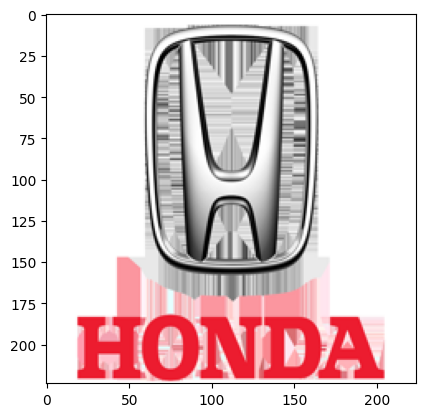

1/1 [==============================] - 0s 238ms/step
HONDA


In [15]:
url = "https://1000logos.net/wp-content/uploads/2018/03/Honda-logo.png"
predict_logo(url)

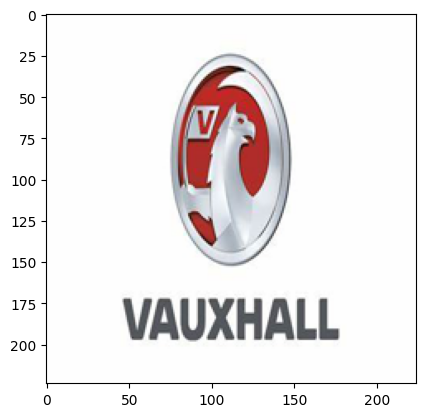

1/1 [==============================] - 0s 264ms/step
VAUXHALL


In [16]:
url = "https://tse2.mm.bing.net/th?id=OIP.4FcSxuTj2K1VjJfzurYPxwHaEK&pid=Api&P=0"
predict_logo(url)

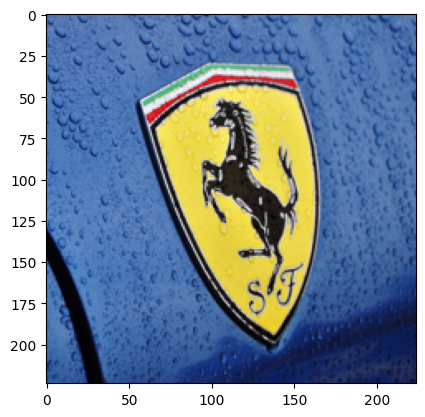

1/1 [==============================] - 0s 201ms/step
FERRARI


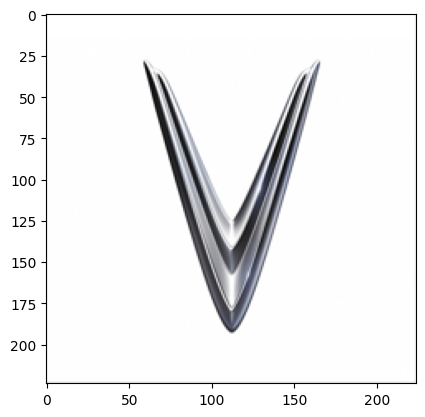

1/1 [==============================] - 0s 162ms/step
VINFAST


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


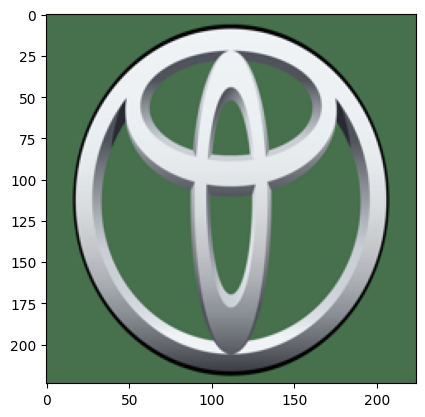

1/1 [==============================] - 0s 198ms/step
TOYOTA


In [19]:
url = "https://th.bing.com/th/id/R.e4503c30694e6bfc7c6a9a632354c76b?rik=ECK6RgaJR%2bn7MA&pid=ImgRaw&r=0"
predict_logo(url)


url = "https://th.bing.com/th/id/R.48e6096fdf0dbe194dd1364bc7208445?rik=F%2fNxX8HwLqMMug&pid=ImgRaw&r=0"
predict_logo(url)


url = "https://th.bing.com/th/id/R.dcffe387e445a190eeb7513b67330bf1?rik=tdDQoqjF0jHvEg&pid=ImgRaw&r=0"
predict_logo(url)

In [ ]:
# update new data from git

# thêm 1 hãng xe nữa: PAGANI

%cd AIN501/
!git pull

/content/AIN501
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 79 (delta 3), reused 79 (delta 3), pack-reused 0
Unpacking objects: 100% (79/79), 829.66 KiB | 13.17 MiB/s, done.
From https://github.com/minhhieu9800/AIN501
   f591f2b..d9ea2d2  main       -> origin/main
Updating f591f2b..d9ea2d2
Fast-forward
 train/PAGANI/PAGANI_0.jpeg     | Bin 0 -> 20999 bytes
 train/PAGANI/PAGANI_1.jpeg     | Bin 0 -> 19663 bytes
 train/PAGANI/PAGANI_10.jpeg    | Bin 0 -> 2128 bytes
 train/PAGANI/PAGANI_11.jpeg    | Bin 0 -> 2271 bytes
 train/PAGANI/PAGANI_12.jpeg    | Bin 0 -> 2626 bytes
 train/PAGANI/PAGANI_13.jpeg    | Bin 0 -> 2128 bytes
 train/PAGANI/PAGANI_14.jpeg    | Bin 0 -> 27962 bytes
 train/PAGANI/PAGANI_15.jpeg    | Bin 0 -> 22128 bytes
 train/PAGANI/PAGANI_16.jpeg    | Bin 0 -> 10003 bytes
 train/PAGANI/PAGANI_17.jpeg    | Bin 0 -> 19044 bytes
 train/PAGANI/PAGANI_18.jpeg    | Bin 0 -> 163

In [ ]:
# Lấy mô hình đã được huấn luyện trước đó
base_model = load_model("/content/logo_model.h5")

# Loại bỏ lớp cuối cùng của mô hình
base_model.layers.pop()

# Thêm một lớp mới tương ứng với số lượng logo mới
num_classes = len([f for f in os.listdir(train_dir) if not f.endswith('.zip')]) # số lượng logo mới

# Loại bỏ lớp cuối cùng của mô hình:
model.layers.pop()

# Đóng băng các lớp đã được huấn luyện trước đó
for layer in model.layers:
    layer.trainable = False

new_output = Dense(num_classes, activation='softmax')(base_model.layers[-1].output)

# Tạo mô hình mới
model = Model(inputs=base_model.inputs, outputs=new_output)

# Huấn luyện mô hình với tập dữ liệu mới, bao gồm cả logo cũ và logo mới
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Lưu lại mô hình đã được huấn luyện để sử dụng lại sau này
model.save('update_logo_model.h5')


Found 1257 images belonging to 46 classes.
Found 1716 images belonging to 46 classes.
Epoch 1/100
39/39 [==============================] - 24s 591ms/step - loss: 3.8164 - accuracy: 0.0743 - val_loss: 3.8058 - val_accuracy: 0.0531
Epoch 2/100
39/39 [==============================] - 22s 574ms/step - loss: 3.8020 - accuracy: 0.0735 - val_loss: 3.7952 - val_accuracy: 0.0584
Epoch 3/100
39/39 [==============================] - 22s 567ms/step - loss: 3.7928 - accuracy: 0.0898 - val_loss: 3.7829 - val_accuracy: 0.0637
Epoch 4/100
39/39 [==============================] - 23s 586ms/step - loss: 3.7835 - accuracy: 0.0931 - val_loss: 3.7766 - val_accuracy: 0.0649
Epoch 5/100
39/39 [==============================] - 21s 541ms/step - loss: 3.7737 - accuracy: 0.0955 - val_loss: 3.7654 - val_accuracy: 0.0702
Epoch 6/100
39/39 [==============================] - 22s 567ms/step - loss: 3.7696 - accuracy: 0.1045 - val_loss: 3.7663 - val_accuracy: 0.0731
Epoch 7/100
39/39 [==============================]